In [5]:
import pandas as pd

In [6]:
df=pd.read_csv("all_month_full_data.csv")

In [7]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales price,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9
...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles(CA),20
185946,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco(CA),16
185947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco(CA),7
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco(CA),17


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


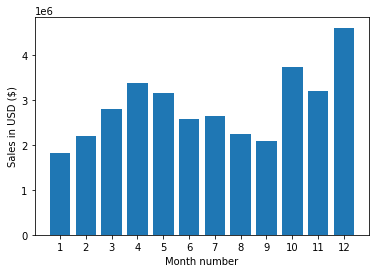

In [14]:
import matplotlib.pyplot as plt

months =[month for month,df in df.groupby(['month'])]
print(months)


plt.bar(months,df.groupby(['month']).sum()['sales price'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

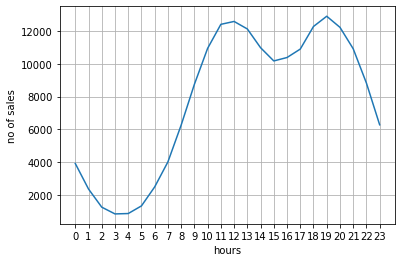

In [16]:
hrs=[hr for hr ,df in df.groupby(['Hour'])]
plt.plot(hrs,df.groupby(['Hour']).count()['Order ID'])
plt.xticks(hrs)
plt.xlabel('hours')
plt.ylabel('no of sales')
plt.grid()

Text(0, 0.5, 'sales in $')

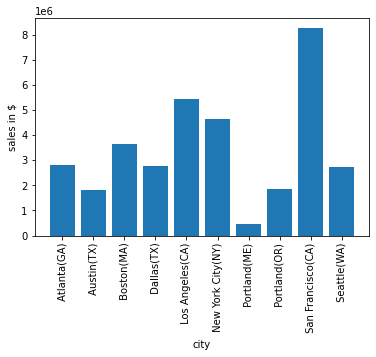

In [17]:
city= [city for city,df in df.groupby(['city'])]

plt.bar(city,df.groupby(['city']).sum()['sales price'])
plt.xticks(city,rotation='vertical')
plt.xlabel('city')
plt.ylabel('sales in $')

<ipython-input-32-9ba77875a320>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical')


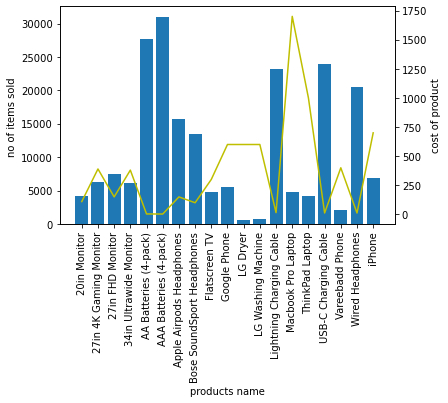

In [32]:
products=[product  for product , df in df.groupby('Product')]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,df.groupby(['Product']).sum()['Quantity Ordered'] )
ax2.plot(products,df.groupby(['Product']).mean()['Price Each'], color='y')
ax1.set_xticklabels(products, rotation='vertical')
ax1.set_xlabel('products name')
ax1.set_ylabel('no of items sold ')
ax2.set_ylabel('cost of product')
plt.show()


# products often ordered together

##some products have same same order date and order id that means they are order once.
##lets find out what products are ordered more together

concatenate the string
df['branch'] = df.groupby(['Name'])['branch'].transform(lambda x : ' '.join(x))

drop duplicate data
df = df.drop_duplicates()

In [33]:
df=df[df['Order ID'].duplicated(keep=False)]

In [34]:
df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

<ipython-input-34-35904db16930>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [36]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales price,city,Hour,grouped
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),19,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles(CA),19,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston(MA),11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [37]:
df=df[['Order ID','grouped']].drop_duplicates()
df.head()

,Order ID,grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [38]:
from itertools import combinations
from collections import Counter

Count=Counter()

for row in df['grouped']:
    row_list = row.split(',')
    Count.update(Counter(combinations(row_list, 3)))

In [39]:
Count

Counter({('Google Phone',
          'Bose SoundSport Headphones',
          'Wired Headphones'): 24,
         ('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)'): 3,
         ('Google Phone',
          'USB-C Charging Cable',
          'Bose SoundSport Headphones'): 35,
         ('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'): 87,
         ('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable'): 2,
         ('Google Phone', 'Wired Headphones', 'USB-C Charging Cable'): 2,
         ('USB-C Charging Cable',
          'Wired Headphones',
          'USB-C Charging Cable'): 1,
         ('iPhone', 'Lightning Charging Cable', 'Wired Headphones'): 62,
         ('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone'): 1,
         ('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable'): 3,
         ('iPhone',
          'Lightning Charging Cable',
          'Apple Airpods Headphones'): 47,
         ('Vareebadd Phone',
          'USB-C Charging Cable',

# top 20 products often ordered together


In [40]:
for prod,value in Count.most_common(20):
    print(prod, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 3
('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable') 3
('iPhone', 'Lightning Charging Cable', 'AA Batteries (4-pack)') 3
('Google Phone', 'USB-C 

In [41]:
for row in df['grouped']:
    row_list = row.split(',')
    Count.update(Counter(combinations(row_list, 2)))
    
for prod,value in Count.most_common(20):
    print(prod, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphon